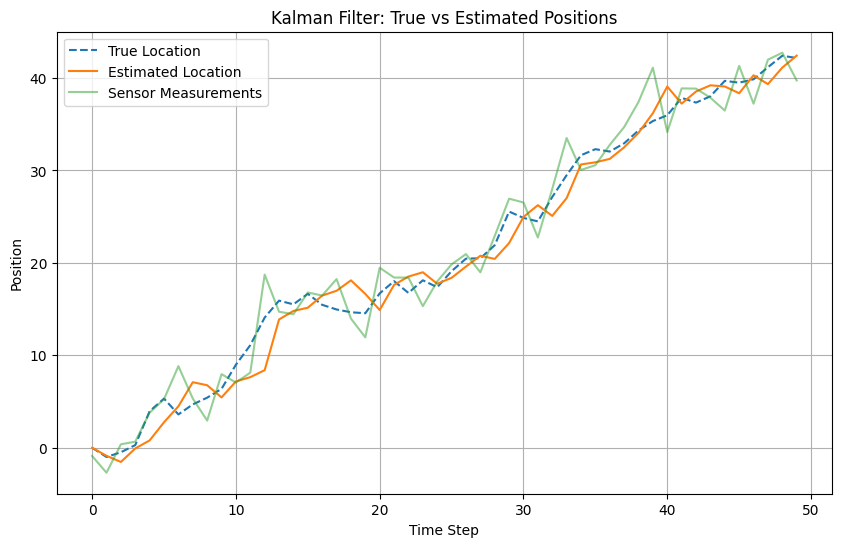

Mean Squared Error (Estimates vs True): 3.27
Mean Squared Error (Measurements vs True): 4.61


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

class Drone:
    """
    Simulates a drone"s movement and noisy sensor readings.

    Attributes:
        initial_position (float): Initial position of the drone.
        movement (float): Average movement per step.
        mov_variance (float): Variance of the movement noise.
        sensor_variance (float): Variance of the sensor noise.
    """
    def __init__(self, initial_position, movement, mov_variance, sensor_variance):
        self.position = initial_position
        self.movement = movement
        self.mov_variance = mov_variance
        self.sensor_variance = sensor_variance

    def get_true_position(self):
        return self.position

    def measure_and_move(self):
        """
        Simulates drone movement and noisy sensor measurement.
        """
        current_position = self.position
        # Simulate movement with process noise
        movement = np.random.normal(loc=self.movement, scale=np.sqrt(self.mov_variance))
        self.position += movement
        # Simulate sensor measurement with measurement noise
        sensor_output = np.random.normal(loc=current_position, scale=np.sqrt(self.sensor_variance))
        return sensor_output

def predict(position, position_variance, movement, movement_variance):
    """
    Predict step: Updates belief based on motion model.
    """
    new_position = position + movement
    new_position_variance = position_variance + movement_variance
    return new_position, new_position_variance

def update(position, position_variance, measurement, measurement_variance):
    """
    Update step: Combines belief and sensor observation using the Kalman Gain.
    """
    residual = measurement - position
    kalman_gain = position_variance / (position_variance + measurement_variance)
    new_position = position + kalman_gain * residual
    new_position_variance = (1 - kalman_gain) * position_variance
    return new_position, new_position_variance

def main():
    N = 50  # Number of time steps
    init_position = 0
    init_uncertainty = 20**2  # Initial variance (high uncertainty)

    # Initial state for the Kalman Filter
    position = init_position
    position_variance = init_uncertainty

    movement = 1.0  # Constant expected movement
    movement_variance = 2.0  # Variance in movement noise

    # Sensor noise level provided by the manufacturer
    sensor_variance = 4.5

    # Initialize the drone
    drone = Drone(init_position, movement, movement_variance, sensor_variance)

    # Lists to record data
    true_positions = []
    estimated_positions = []
    sensor_measurements = []

    # Simulate drone movement and Kalman Filter estimation
    for _ in range(N):
        true_positions.append(drone.get_true_position())
        estimated_positions.append(position)

        # Predict step
        position, position_variance = predict(position, position_variance, movement, movement_variance)

        # Measure step
        measurement = drone.measure_and_move()
        sensor_measurements.append(measurement)

        # Update step
        position, position_variance = update(position, position_variance, measurement, sensor_variance)

    # Visualization
    plt.figure(figsize=(10, 6))
    plt.plot(np.arange(N), true_positions, label="True Location", linestyle="--")
    plt.plot(np.arange(N), estimated_positions, label="Estimated Location")
    plt.plot(np.arange(N), sensor_measurements, label="Sensor Measurements", alpha=0.5)
    plt.xlabel("Time Step")
    plt.ylabel("Position")
    plt.title("Kalman Filter: True vs Estimated Positions")
    plt.grid()
    plt.legend(loc="best")
    plt.show()

    # Calculate and print Mean Squared Errors (MSE)
    mse_estimates = mean_squared_error(true_positions, estimated_positions)
    mse_measurements = mean_squared_error(true_positions, sensor_measurements)

    print(f"Mean Squared Error (Estimates vs True): {mse_estimates:.2f}")
    print(f"Mean Squared Error (Measurements vs True): {mse_measurements:.2f}")

if __name__ == "__main__":
    main()
